In [1]:
# https://bellcurve.jp/statistics/glossary/644.html
# 一般線形モデル(LM)目的変数が正規分布である場合を想定する
# 目的変数が正規分布以外である場合、一般化線形モデル(GLM)を用いる
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
beer = pd.read_csv('beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


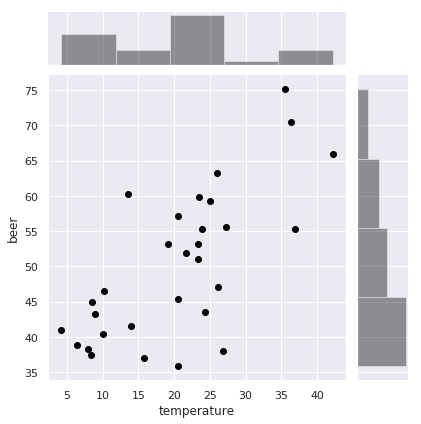

In [3]:
sns.jointplot(x='temperature', y='beer', data=beer, color='black')

In [4]:
lm_model = smf.ols(formula='beer ~ temperature', data=beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           1.11e-05
Time:                        10:56:26   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
null_model = smf.ols('beer~1', data=beer).fit()
null_model.aic

227.94194972563105

In [6]:
# 気温という説明変数があった方が予測精度が高くなる可能性が高いことがわkる
lm_model.aic

208.90902935575437

In [7]:
lm_model.llf

-102.45451467787719

In [8]:
lm_model.df_model

1.000

In [9]:
-2*(lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

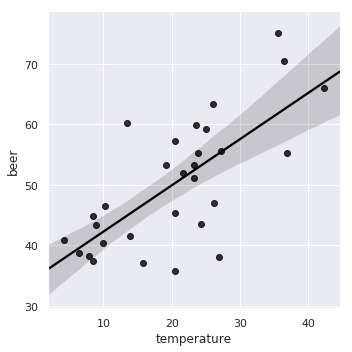

In [10]:
sns.lmplot(
    x='temperature',
    y='beer',
    data=beer,
    scatter_kws={'color': 'black'},
    line_kws={'color': 'black'}
)

In [11]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [12]:
lm_model.predict(pd.DataFrame({'temperature': [0]}))

0    34.610215
dtype: float64

In [13]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [14]:
lm_model.predict(pd.DataFrame({'temperature': [20]}))

0    49.918767
dtype: float64

In [15]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.91876701095054

In [16]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [17]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [18]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [19]:
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()
sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)

0.503959323061187

In [20]:
lm_model.rsquared

0.5039593230611856

In [21]:
sp.sum((yhat - mu)**2) + sum(resid**2)

3277.114666666669

In [22]:
sp.sum((y - mu)**2)

3277.1146666666655

In [23]:
sp.sum((y - mu)**2)

3277.1146666666655

In [24]:
1 - sp.sum(resid**2) / sp.sum((y - mu)**2)

0.5039593230611857

In [25]:
n = len(beer.beer)
s = 1
1 - ((sp.sum(resid**2) / (n - s - 1)) / (sp.sum((y - mu)**2) / (n - 1))) 

0.48624358459908523

In [26]:
lm_model.rsquared_adj

0.4862435845990851

In [27]:
lm_model.rsquared_adj

0.4862435845990851

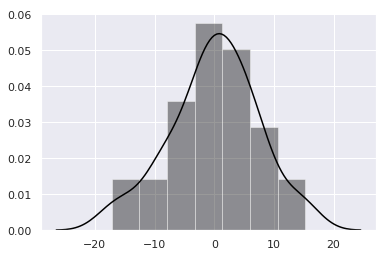

In [28]:
sns.distplot(resid, color='black')

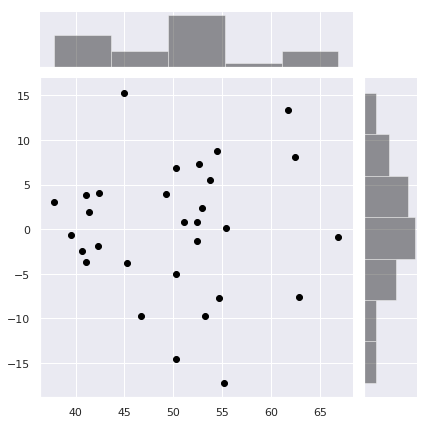

In [29]:
sns.jointplot(
    lm_model.fittedvalues,
    resid,
    joint_kws={'color': 'black'},
    marginal_kws={'color': 'black'}
)

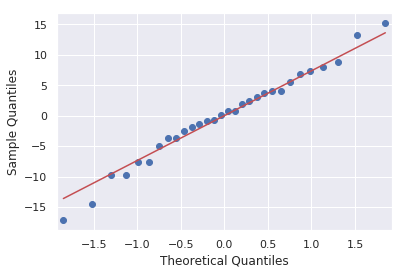

In [30]:
fig = sm.qqplot(resid, line='s')

In [31]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [32]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [33]:
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])